<a href="https://colab.research.google.com/github/hiroalchem/data_science_lecture/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データサイエンス講義第一回 (その2)
これはデータサイエンス講義第一回用スクリプトです

このスクリプトでは学習に使う画像データの準備を行います 
画像はここの画像を使います  
https://bbbc.broadinstitute.org/BBBC039   

In [37]:
# まず必要なディレクトリを用意します
import os
%cd /content/drive/MyDrive/lecture2020
os.makedirs('./trial1_images', exist_ok=True)
os.makedirs('./trial1_images/downloads', exist_ok=True)
os.makedirs('./trial1_images/train', exist_ok=True)
os.makedirs('./trial1_images/validation', exist_ok=True)
os.makedirs('./trial1_images/test', exist_ok=True)
%cd trial1_images

/content/drive/MyDrive/lecture2020
/content/drive/MyDrive/lecture2020/trial1_images


In [6]:
# 画像をダウンロードします
!wget https://data.broadinstitute.org/bbbc/BBBC039/images.zip -P ./downloads
!unzip ./downloads/images.zip -d ./downloads

--2020-11-24 06:54:47--  https://data.broadinstitute.org/bbbc/BBBC039/images.zip
Resolving data.broadinstitute.org (data.broadinstitute.org)... 69.173.92.29
Connecting to data.broadinstitute.org (data.broadinstitute.org)|69.173.92.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77915748 (74M) [application/zip]
Saving to: ‘./downloads/images.zip’

images.zip          100%[===================>]  74.31M  10.7MB/s    in 7.4s    

2020-11-24 06:54:54 (10.1 MB/s) - ‘./downloads/images.zip’ saved [77915748/77915748]

Archive:  ./downloads/images.zip
   creating: ./downloads/images/
  inflating: ./downloads/images/IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.tif  
   creating: ./downloads/__MACOSX/
   creating: ./downloads/__MACOSX/images/
  inflating: ./downloads/__MACOSX/images/._IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.tif  
  inflating: ./downloads/images/IXMtest_A06_s6_w1B9577918-4973-4A87-BA73-A168AA755527.tif  
  inflating: ./downloads/

In [7]:
# 画像の枚数
from pathlib import Path
data_dir = Path('./downloads/images')
imps = sorted(list(data_dir.glob('./*tif')))
print(f'画像の枚数は {len(imps)} 枚')

画像の枚数は 200 枚


In [18]:
#5枚を学習用、2枚をvalidation用、5枚をテスト用にランダムに選びます
import random

images_temp = random.sample(imps, 12)
train_images = images_temp[:5]
validation_images = images_temp[5:7]
test_images = images_temp[7:]


In [34]:
# 輝度を調整した上で16bit画像を8bitに変換する関数を用意しておきます
def convert_to_8bit(image):
  image = 65535 * (image / np.max(image))
  image2 = (image/256).astype('uint8')
  return image2

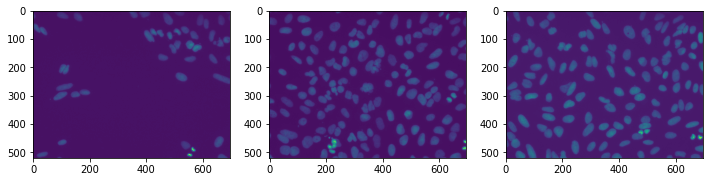

In [35]:
# 画像を確認
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(convert_to_8bit(cv2.imread(str(train_images[0]),-1)), vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(convert_to_8bit(cv2.imread(str(validation_images[0]),-1)), vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(convert_to_8bit(cv2.imread(str(test_images[0]),-1)), vmin=0, vmax=255)

In [21]:
# このままだと大きいので2x2に分割します
import numpy as np
def split(image):
    out_img = []
    h_split = 2
    v_split = 2
    [out_img.extend(np.hsplit(h_img, h_split)) for h_img in np.vsplit(image, v_split)]
    return out_img

In [22]:
# 分割画像をpngで保存する関数を用意します
def save_image(imagelist, name, out_dir):
    for i, image in enumerate(imagelist):
        cv2.imwrite(os.path.join(out_dir, name + '_' + str(i) + '.png'), image)

In [23]:
# 分割して保存します
def split_and_save(imp, out_dir):
  image = convert_to_8bit(cv2.imread(str(imp),-1))
  image_splitted = split(image)
  save_image(image_splitted, imp.stem, out_dir)

In [38]:
for imp in train_images:
  split_and_save(imp, './train')
for imp in validation_images:
  split_and_save(imp, './validation')
for imp in test_images:
  split_and_save(imp, './test')

google driveで画像を確認し、ダウンロードしましょう  
ラベル付けは手元のlabelimg (https://github.com/tzutalin/labelImg)   
で行います